# 画像分類例題

## 環境構築方法

1. anaconda promptを開く

2. 以下のコマンドを実行

conda create -n hogehogehoge python==3.8

conda activate hogehogehoge

pip install torch torchvision matplotlib ipywidgets widgetsnbextension

jupyter notebook

## ライブラリインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch import optim
np.set_printoptions(suppress=True, precision=1,linewidth=280)

## データセット取得

In [2]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.ToTensor(), 
    download = True,            
)

train_data_loader = torch.utils.data.DataLoader(train_data,
                                                batch_size=100,
                                                shuffle=True)


## データの中身を確認

images.size() = torch.Size([100, 1, 28, 28])
labels[1] = tensor(1)
images[1][0].numpy() =
 [[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 1.  0.3 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 1.  0.4 0.  0.  0.  0.  0.  0.  0.

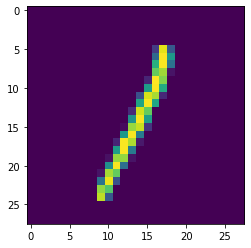

In [3]:
train_data_iter = iter(train_data_loader)
images, labels = train_data_iter.next()

i=1
print("images.size() =",images.size())
print("labels["+str(i)+"] =",labels[i]) # 生ラベル
print("images["+str(i)+"][0].numpy() =\n",images[i][0].numpy())
plt.imshow(images[i][0])


## CNN

In [4]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Sequential(         
                         torch.nn.Conv2d(
                             in_channels=1,              
                             out_channels=16,            
                             kernel_size=5,              
                             stride=1,                   
                             padding=2,                  
                         ),                              
                         torch.nn.ReLU(),                      
                         torch.nn.MaxPool2d(kernel_size=2),    
                      )
        self.conv2 = torch.nn.Sequential(
                         torch.nn.Conv2d(
                             in_channels=16, 
                             out_channels=32, 
                             kernel_size=5, 
                             stride=1, 
                             padding=2
                         ),
                         torch.nn.ReLU(),                      
                         torch.nn.MaxPool2d(2),                
                     )
        self.fc = torch.nn.Linear(32 * 7 * 7, 10)
        self.out = torch.nn.Softmax()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)       
        output = self.out(self.fc(x))
        return output

In [5]:
cnn = CNN()
print("CNN =",cnn)

CNN = CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
  (out): Softmax(dim=None)
)


## クロスエントロピー損失

In [6]:
loss_func = torch.nn.CrossEntropyLoss()   

## 確率的勾配降下法

In [7]:
optimizer = optim.SGD(cnn.parameters(), lr = 0.9)   
# optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   

## 分類器の訓練

In [8]:
for epoch in range(1):
    running_loss = 0.0
    for data in train_data_loader:
        images, labels = data
        
        optimizer.zero_grad()

        outputs = cnn(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print("running_loss =",running_loss)


C:\Users\toru.hishinuma\AppData\Local\Temp\ipykernel_7760\3992617524.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.out(self.fc(x))


running_loss = 1017.3765811920166


## 訓練した分類器の予測を確認

labels[2] = tensor(2)
outputs[2] = tensor([1.0616e-17, 1.7362e-15, 9.9982e-01, 1.8902e-11, 9.3599e-20, 1.0304e-20,
        3.0525e-24, 1.8045e-04, 1.2478e-14, 5.2312e-13],
       grad_fn=<SelectBackward0>)
torch.argmax(outputs[2]) = tensor(2)
images[2][0].numpy() =
 [[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

C:\Users\toru.hishinuma\AppData\Local\Temp\ipykernel_7760\3992617524.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.out(self.fc(x))


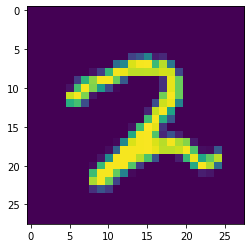

In [9]:
train_data_iter = iter(train_data_loader)
images, labels = train_data_iter.next()
outputs = cnn(images)

i=2
print("labels["+str(i)+"] =",labels[i]) # 生ラベル
print("outputs["+str(i)+"] =",outputs[i]) # 予測one-hot表現
print("torch.argmax(outputs["+str(i)+"]) =",torch.argmax(outputs[i])) # 予測ラベル
print("images["+str(i)+"][0].numpy() =\n",images[i][0].numpy())
plt.imshow(images[i][0])
